In [1]:
python3 -m pip install tensorflow[and-cuda]
# Verify the installation:
python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

SyntaxError: invalid syntax (1970068086.py, line 1)

In [4]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('climate_change_data.csv')

# Select relevant features and target variables
features = data[['CO2 Emissions', 'Temperature', 'Humidity']]
target = data[['Temperature', 'Humidity']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(2)  # 2 output nodes for Temperature and Humidity
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Adjust the loss function based on your problem

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error on Test Set: {loss}')

# Make predictions
predictions = model.predict(X_test_scaled)

# You can further analyze and visualize the predictions as needed.

Epoch 1/50
200/200 [==============================] - 3s 8ms/step - loss: 1115.0219 - val_loss: 132.5111
Epoch 2/50
200/200 [==============================] - 1s 6ms/step - loss: 53.5387 - val_loss: 26.4193
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 20.1425 - val_loss: 12.1772
Epoch 4/50
200/200 [==============================] - 1s 6ms/step - loss: 8.7867 - val_loss: 4.9598
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 3.6171 - val_loss: 2.1287
Epoch 6/50
200/200 [==============================] - 1s 5ms/step - loss: 1.6937 - val_loss: 1.1260
Epoch 7/50
200/200 [==============================] - 1s 6ms/step - loss: 0.9284 - val_loss: 0.6692
Epoch 8/50
200/200 [==============================] - 1s 5ms/step - loss: 0.5631 - val_loss: 0.3922
Epoch 9/50
200/200 [==============================] - 1s 5ms/step - loss: 0.3333 - val_loss: 0.2510
Epoch 10/50
200/200 [==============================] - 1s 5ms/step - loss: 0.2150 - val_los

In [6]:
!pip install pandas


     ---------------------------------------- 10.7/10.7 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 346.6/346.6 kB 3.6 MB/s eta 0:00:00


In [8]:
!pip install scikit-learn

     ---------------------------------------- 9.3/9.3 MB 2.2 MB/s eta 0:00:00
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [9]:
!pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 186.7/186.7 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 103.1/103.1 kB 6.2 MB/s eta 0:00:00


In [10]:
!pip install numpy

In [11]:
!pip install seaborn

     ------------------------------------ 294.8/294.8 kB 350.0 kB/s eta 0:00:00


In [12]:
!pip install keras

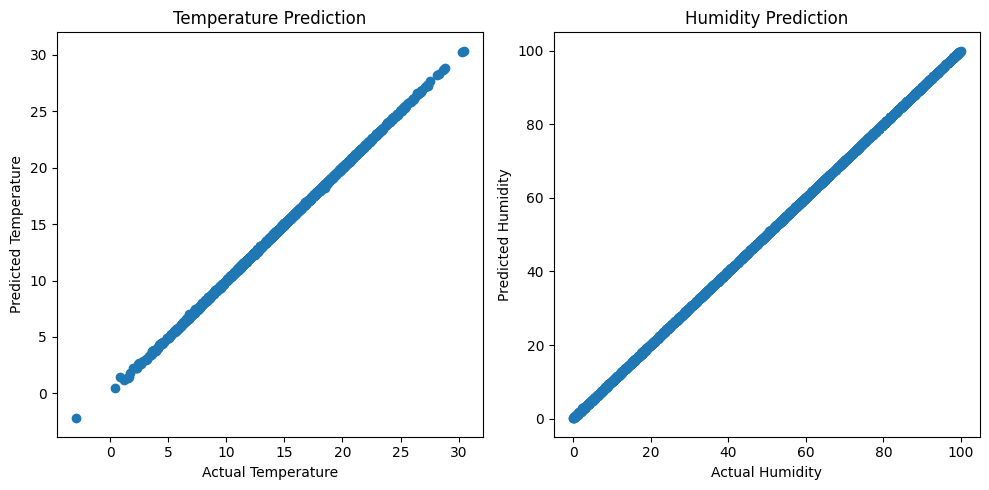

In [16]:
import matplotlib.pyplot as plt

# Visualize the predictions for Temperature
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test['Temperature'], predictions[:, 0])
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Temperature Prediction')

# Visualize the predictions for Humidity
plt.subplot(1, 2, 2)
plt.scatter(y_test['Humidity'], predictions[:, 1])
plt.xlabel('Actual Humidity')
plt.ylabel('Predicted Humidity')
plt.title('Humidity Prediction')

plt.tight_layout()
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print metrics for Temperature
mse_temperature = mean_squared_error(y_test['Temperature'], predictions[:, 0])
r2_temperature = r2_score(y_test['Temperature'], predictions[:, 0])
print(f'Mean Squared Error for Temperature: {mse_temperature}')
print(f'R-squared for Temperature: {r2_temperature}')

# Calculate and print metrics for Humidity
mse_humidity = mean_squared_error(y_test['Humidity'], predictions[:, 1])
r2_humidity = r2_score(y_test['Humidity'], predictions[:, 1])
print(f'Mean Squared Error for Humidity: {mse_humidity}')
print(f'R-squared for Humidity: {r2_humidity}')


Mean Squared Error for Temperature: 0.0021755843787539387
R-squared for Temperature: 0.9999155120122305
Mean Squared Error for Humidity: 0.005302532564179938
R-squared for Humidity: 0.9999937717041028


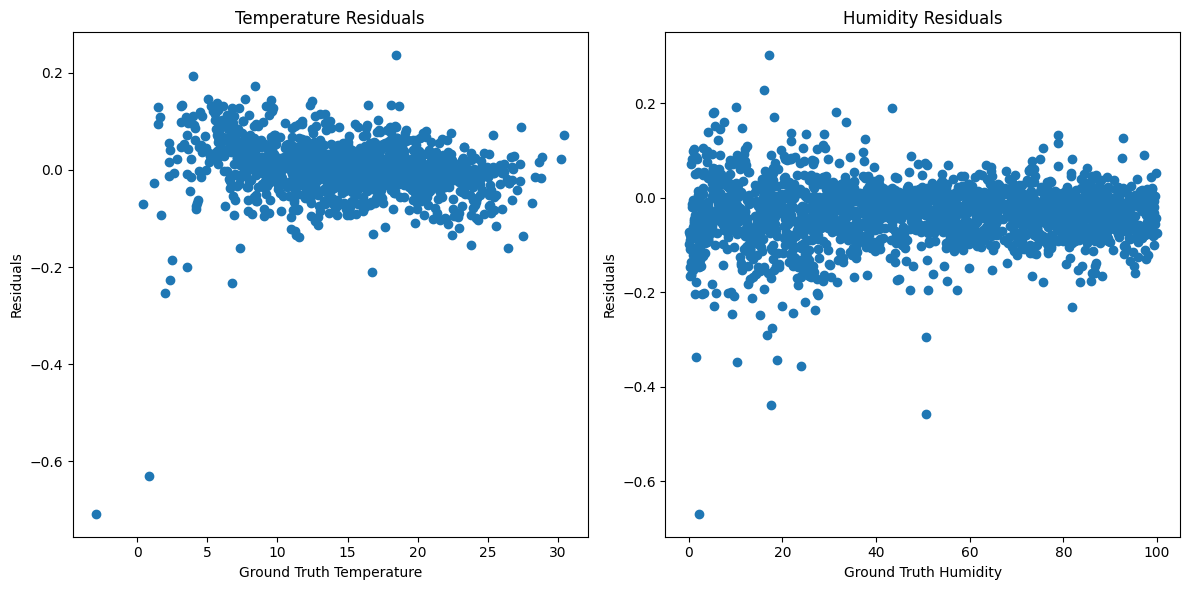

In [18]:
# Calculate residuals for Temperature and Humidity
residuals_temperature = y_test['Temperature'] - predictions[:, 0]
residuals_humidity = y_test['Humidity'] - predictions[:, 1]

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test['Temperature'], residuals_temperature)
plt.title('Temperature Residuals')
plt.xlabel('Ground Truth Temperature')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test['Humidity'], residuals_humidity)
plt.title('Humidity Residuals')
plt.xlabel('Ground Truth Humidity')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

250/250 [==============================] - 1s 4ms/step


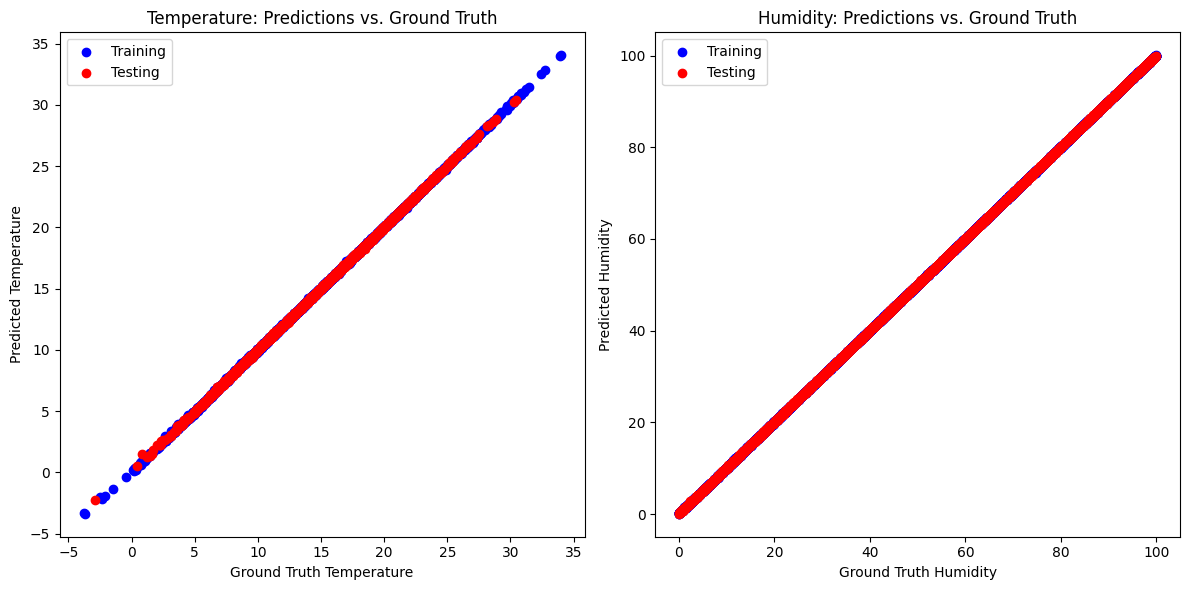

In [19]:
import matplotlib.pyplot as plt

# Visualize predictions vs. ground truth for Temperature
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train['Temperature'], model.predict(X_train_scaled)[:, 0], color='blue', label='Training')
plt.scatter(y_test['Temperature'], predictions[:, 0], color='red', label='Testing')
plt.title('Temperature: Predictions vs. Ground Truth')
plt.xlabel('Ground Truth Temperature')
plt.ylabel('Predicted Temperature')
plt.legend()

# Visualize predictions vs. ground truth for Humidity
plt.subplot(1, 2, 2)
plt.scatter(y_train['Humidity'], model.predict(X_train_scaled)[:, 1], color='blue', label='Training')
plt.scatter(y_test['Humidity'], predictions[:, 1], color='red', label='Testing')
plt.title('Humidity: Predictions vs. Ground Truth')
plt.xlabel('Ground Truth Humidity')
plt.ylabel('Predicted Humidity')
plt.legend()

plt.tight_layout()
plt.show()

250/250 [==============================] - 1s 4ms/step


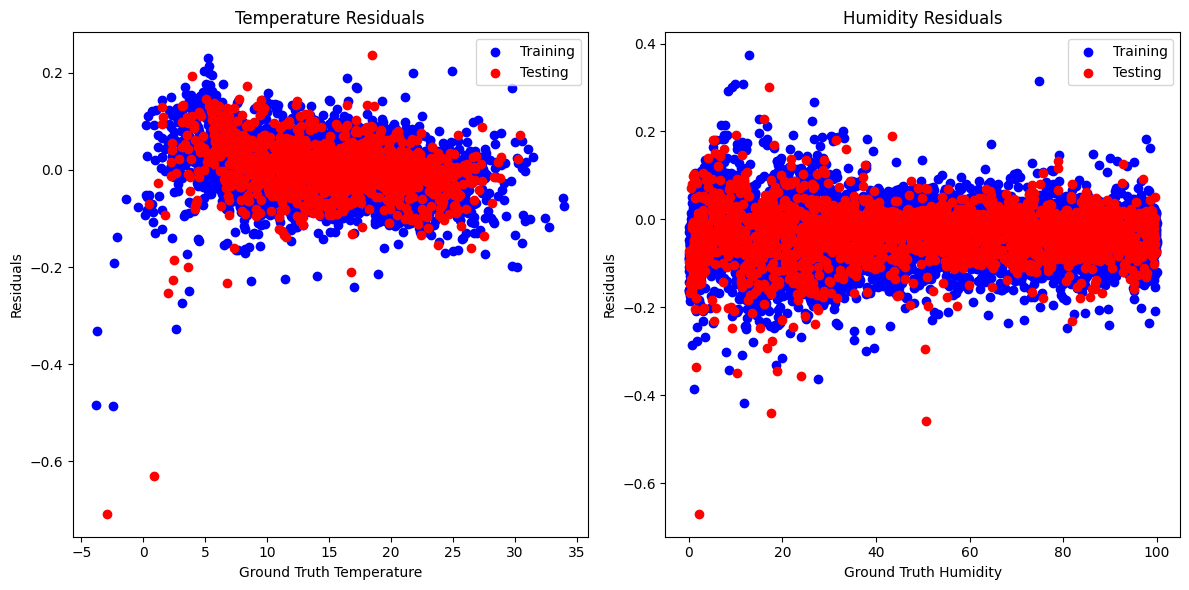

In [20]:
# Calculate residuals for Temperature and Humidity
residuals_temperature_train = y_train['Temperature'] - model.predict(X_train_scaled)[:, 0]
residuals_humidity_train = y_train['Humidity'] - model.predict(X_train_scaled)[:, 1]

residuals_temperature_test = y_test['Temperature'] - predictions[:, 0]
residuals_humidity_test = y_test['Humidity'] - predictions[:, 1]

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train['Temperature'], residuals_temperature_train, color='blue', label='Training')
plt.scatter(y_test['Temperature'], residuals_temperature_test, color='red', label='Testing')
plt.title('Temperature Residuals')
plt.xlabel('Ground Truth Temperature')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_train['Humidity'], residuals_humidity_train, color='blue', label='Training')
plt.scatter(y_test['Humidity'], residuals_humidity_test, color='red', label='Testing')
plt.title('Humidity Residuals')
plt.xlabel('Ground Truth Humidity')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('climate_change_data.csv')

# Select relevant features and target variable
features = data[['CO2 Emissions']]
target = data['Temperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # 1 output node for Temperature
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Adjust the loss function based on your problem

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error on Test Set: {loss}')

# Make predictions for a new CO2 emissions value
new_co2_emissions = np.array([[406]])  # Replace 'your_new_value' with the CO2 emissions value you want to predict
new_co2_emissions_scaled = scaler.transform(new_co2_emissions)

predicted_temperature = model.predict(new_co2_emissions_scaled)
print(f'Predicted Temperature: {predicted_temperature[0][0]}')


Epoch 1/50
200/200 [==============================] - 3s 7ms/step - loss: 123.1119 - val_loss: 33.6898
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 29.0915 - val_loss: 26.4707
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 26.1558 - val_loss: 24.9177
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 25.7315 - val_loss: 24.6021
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 25.6004 - val_loss: 24.4284
Epoch 6/50
200/200 [==============================] - 1s 5ms/step - loss: 25.5755 - val_loss: 24.6517
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 25.5431 - val_loss: 24.4512
Epoch 8/50
200/200 [==============================] - 1s 5ms/step - loss: 25.5636 - val_loss: 24.8182
Epoch 9/50
200/200 [==============================] - 1s 5ms/step - loss: 25.5539 - val_loss: 24.3373
Epoch 10/50
200/200 [==============================] - 1s 5ms/step - loss: 25.519

C:\Users\aarna\Downloads\Python\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 178ms/step
Predicted Temperature: 15.003144264221191


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('climate_change_data.csv')

# Select relevant features and target variable
features = data[['CO2 Emissions']]
target = data['Humidity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # 1 output node for Temperature
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Adjust the loss function based on your problem

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error on Test Set: {loss}')

# Make predictions for a new CO2 emissions value
new_co2_emissions = np.array([[300]])  # Replace 'your_new_value' with the CO2 emissions value you want to predict
new_co2_emissions_scaled = scaler.transform(new_co2_emissions)

predicted_humidity = model.predict(new_co2_emissions_scaled)
print(f'Predicted Humidity: {predicted_humidity[0][0]}')

Epoch 1/50
200/200 [==============================] - 3s 7ms/step - loss: 2535.0549 - val_loss: 1132.4691
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 900.5616 - val_loss: 857.1760
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 847.5553 - val_loss: 840.6484
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 839.6141 - val_loss: 837.2855
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 836.9304 - val_loss: 833.9091
Epoch 6/50
200/200 [==============================] - 1s 5ms/step - loss: 835.1990 - val_loss: 835.4194
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 835.9116 - val_loss: 834.7547
Epoch 8/50
200/200 [==============================] - 1s 5ms/step - loss: 834.4073 - val_loss: 835.6531
Epoch 9/50
200/200 [==============================] - 1s 5ms/step - loss: 834.8585 - val_loss: 833.9960
Epoch 10/50
200/200 [==============================] - 1s 5ms/

C:\Users\aarna\Downloads\Python\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 154ms/step
Predicted Humidity: 50.0771369934082
